# Notebook to start with Backtrader

This notebook presents Backtrader's basic functions:  
- instantiate cerebro engine  
- set amount of the portfolio  
- print messages such as the closing price at one date  
- load data from a csv file  
- create a trading strategy to generate buy / sell signals  
- generate logs when a signal is triggered

#### For further information about backtrader, have a look at the following page:

https://www.backtrader.com/docu/quickstart/quickstart/

In [1]:
# Import libraries

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)


import backtrader as bt # Import the backtrader platform

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

## 1. Print portfolio start & final values

Here, all we do is to  
- instantiate cerebro engine  
- select and print value of the portfolio at start  
- run cerebro engine  
- print final value of the portfolio  

No strategy has been created so final value of the portfolio = starting value.

In [2]:
if __name__ == '__main__':
    
    # Instanciate Cerebro engine
    # Cerebro creates a broker instance
    cerebro = bt.Cerebro()
    
    # This instance has some cash to start with (default is 10000)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    # Run cerebro engine (loop over data)
    # here there is nothing to do
    cerebro.run()
    
    # At the end, print final value of the portfolio
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


## 2. Change initial value of the portfolio

The only difference here is that we change portfolio value from default, which is 10,000, to 100,000.

In [3]:
if __name__ == '__main__':
    # Instanciate Cerebro engine
    cerebro = bt.Cerebro()
    # Set portfolio value to 100,00
    cerebro.broker.setcash(100000.0)
    # Print portfolio value at start
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # run cerebro engine
    cerebro.run()
    # print final value of the portfolio
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


## 3. Load data

Now let's add some data to cerebro but without any strategy.

In [4]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    # Set cash start (same than above)
    cerebro.broker.setcash(100000.0)

    # load a Dataset from a csv file
    data = bt.feeds.YahooFinanceCSVData(
        # select file
        dataname='data/orcl-1995-2014.csv',
        # select start date
        fromdate=datetime.datetime(2000, 1, 1),
        # select end date
        todate=datetime.datetime(2000, 12, 31),
        # put dates in ascending order
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Print portfolio value at start
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything (nothing here!)
    cerebro.run()

    # Print out the final portfolio value
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


## 4. Create a trading strategy

Now let's add a trading strategy

## 4.1. Add logs

First strategy will just be to add logs so that for each day we get the closing price.

In [12]:
class TestStrategy(bt.Strategy):
    """
    Print close price in logs every day
    """
    def __init__(self):
        """ Keep a reference to the close line in the datas[0] dataseries"""
        self.dataclose = self.datas[0].lines.close

    def log(self, txt, dt=None):
        """ Logging function for this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        # print date followed by any message found in 'txt'
        print('%s, %s' % (dt.isoformat(), txt))

    def next(self):
        """ Simply log the closing price of the series from the reference"""
        # output will be of format "date, Close, a float" (i.e. close price)
        self.log('Close, %.2f' % self.dataclose[0])

### Run backtesting with the new strategy

In [13]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add the strategy (print logs)
    cerebro.addstrategy(TestStrategy)

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.30
2000-02-16, Close, 27.24
2000-02-17, Close, 27.41
2000-02-18, Close, 26.05
2000-02-22, Close, 26.38
2000-02-23, Close, 28.05
2000-02-24, Close, 27.55
2000-02-25, Close, 31.41
2000-02-28, Cl

## 4.2. Add new buy condition

Add new trading strategy to "next" function.  
Strategy is to buy if 2 consecutive declining sessions . No sell conditions, only buy

In [14]:
class TestStrategy2(bt.Strategy):
    """
    Buy after 2 consecutive declining sessions
    """
    def log(self, txt, dt=None):
        """ Logging function for this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        # print date followed by any message found in 'txt'
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """ Keep a reference to the "close" line in the datas[0] dataseries"""
        self.dataclose = self.datas[0].lines.close

    def next(self):
        """ 
        Log close price every day + buy signals if any
        """
        # Log close price level everyday
        self.log('Close, %.2f' % self.dataclose[0])
        
        # Add conditions to generate a buy signal
        # Condition 1: current close less than previous close
        if self.dataclose[0] < self.dataclose[-1]:
            # Condition 2: yesterday's close less than close 2 sessions ago
            if self.dataclose[-1] < self.dataclose[-2]:
                # Buy 1 share if true (default size)
                self.buy()
                # log buy signal with price
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

### Run backtesting with the new strategy

In [15]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add the new strategy (class TestStrategy2)
    cerebro.addstrategy(TestStrategy2)

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, Close, 21.35
2000-01-06, BUY CREATE, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-12, BUY CREATE, 23.49
2000-01-13, Close, 23.36
2000-01-13, BUY CREATE, 23.36
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, Close, 21.07
2000-01-28, BUY CREATE, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.30
2000-02-1

### Plot backtesting results
Must run with matplotlib 3.2.2.  
See https://stackoverflow.com/questions/63471764/importerror-cannot-import-name-warnings-from-matplotlib-dates

<IPython.core.display.Javascript object>


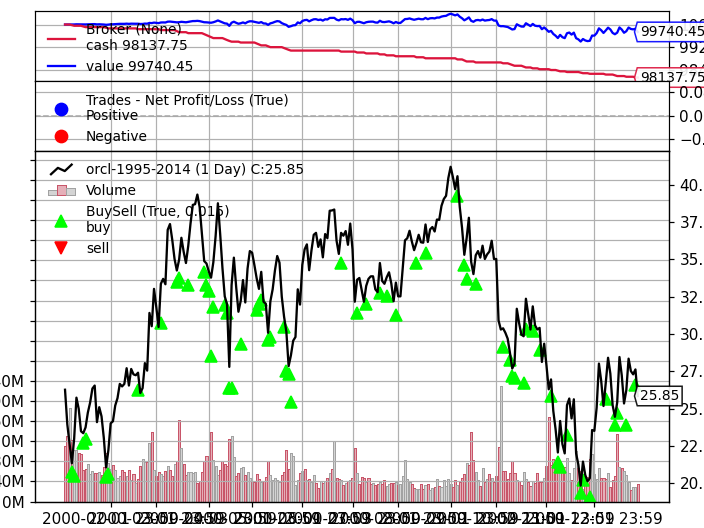

[[<Figure size 640x480 with 4 Axes>]]

In [10]:
cerebro.plot(iplot=True)

# 4.3. Adding sell condition

In [16]:
class TestStrategy3(bt.Strategy):
    """
    Buy after 2 declining sessions and now....
    Sell after 5 sessions!  
    """
    def log(self, txt, dt=None):
        """ Logging function for this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        # print date followed by any message found in 'txt'
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """ 
        Keep a reference to 
        - the "close" line in the data[0] dataseries
        - pending orders
        """
        self.dataclose = self.datas[0].lines.close
        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        """
        Show logs depending on order status:
        - if order is completed, print
            - Buy executed + price
            - Sell executed + price
        - if order is Canceled, Margin or rejected print 
            'Order Canceled/Margin/Rejected'
        - else, do nothing
        """
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        """
        Log closing price avery day
        Check if an order is pending:
        - Yes => nothing to do
        - No => 2 cases:
            - if no position is opened, check buy conditions
            - else means we have a position opened, so ckeck sell condition
        """
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:
            # Not yet ... we MIGHT BUY if ...
            # current close less than previous close
            if self.dataclose[0] < self.dataclose[-1]:
                    # and previous close less than the previous close
                    if self.dataclose[-1] < self.dataclose[-2]:
                        # BUY with default parameters
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])
                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        # else means self.position==True
        else:
            # Already in the market => we might sell if trade has been opened
            # for more than 5 days
            if len(self) >= (self.bar_executed + 5):
                # SELL with all possible default parameters
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

### Run backtesting with the new strategy

In [17]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add the new strategy
    cerebro.addstrategy(TestStrategy3)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, 22.27
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATE, 23.36
2000-01-14, SELL EXECUTED, 24.24
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, 22.90
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SELL CREATE, 25.71
2000-02-07, SELL EXECUTED, 26.38
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, 

Here we can say that trading orders are created using closing prices. However, they are executed the next day at the close, which is in line with real trading.

## 5. Add commision fees

In [18]:
# Create a Strategy
class TestStrategy4(bt.Strategy):
    """
    Buy after 2 declining sessions and now....
    Sell after 5 sessions!
    """
    def log(self, txt, dt=None):
        """ Logging function fot this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """ 
        Keep a reference to 
        - the "close" line in the data[0] dataseries
        - pending orders
        - buy price
        - buy commision
        """
        # Keep a reference to the "close" line in the datas[0] dataseries
        self.dataclose = self.datas[0].lines.close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        """
        Show logs depending on order status:
        - if order is completed, print
            - Buy executed + price + trade value + commissions paid
            - Sell executed + price + trade value + commissions paid
        - if order is Canceled, Margin or rejected print 
            'Order Canceled/Margin/Rejected'
        - else, do nothing
        """
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        """
        When clossing a trade, add new logs line with profit/loss
        Gross profit is before paying trading commissions
        Net profit is after paying commissions
        """
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        """
        Log closing price every day
        Check if an order is pending:
        - Yes => nothing to do
        - No => 2 cases:
            - if no position is opened, check buy conditions
            - else means we have a position opened, so ckeck sell condition
        """
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            # current close less than previous close
            if self.dataclose[0] < self.dataclose[-1]:
                    # previous close less than the previous close
                    if self.dataclose[-1] < self.dataclose[-2]:
                        # BUY with default parameters
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])
                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:
            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL with all possible default parameters
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

### Run backtesting with the new strategy

In [19]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add the new strategy
    cerebro.addstrategy(TestStrategy4)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, 'c:/Users/cyril/jupyter/Backtrader_notebooks/data/orcl-1995-2014.csv')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, Price: 22.27, Cost: 22.27, Comm 0.02
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATE, 23.36
2000-01-14, SELL EXECUTED, Price: 24.24, Cost: 22.27, Comm 0.02
2000-01-14, OPERATION PROFIT, GROSS 1.97, NET 1.92
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, Price: 22.90, Cost: 22.90, Comm 0.02
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SELL CREATE, 25.71
2

## 6. Use parameter to easily change number of days for exit 

Create parameters exitbars at start of the class to change number of days after buy signal to exit position. 

In [20]:
# Create a Strategy
class TestStrategy6(bt.Strategy):
    """
    Same Strategy than above, except that we can easily change
    the number of days to exit position using a parameter
    """
    # Set parameters to use inside class functions
    params = (
        ('exitbars', 5),
    )

    def log(self, txt, dt=None):
        """ Logging function fot this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """ 
        Keep a reference to 
        - the "close" line in the datas[0] dataseries
        - pending orders
        - buy price
        - buy commision
        """
        self.dataclose = self.datas[0].lines.close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        """
        Show logs depending on order status:
        - if order is completed, print
            - Buy executed + price + trade value + commissions paid
            - Sell executed + price + trade value + commissions paid
        - if order is Canceled, Margin or rejected print 
            'Order Canceled/Margin/Rejected'
        - else, do nothing
        """
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        """
        When clossing a trade, add new logs line with profit/loss
        Gross profit is before paying trading commissions
        Net profit is after paying commissions
        """
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        """
        Log clossing price every day
        Check if an order is pending:
        - Yes => nothing to do
        - No => 2 cases:
            - if no position is opened, check buy conditions
            - else means we have a position opened, so ckeck sell condition
            
        For sell condition, use 'self.params.exitbars' instead of integer
        """
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + self.params.exitbars):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

### Run backtesting with the new strategy

In [21]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy6)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = ('data/orcl-1995-2014.csv')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, Price: 22.27, Cost: 222.70, Comm 0.22
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATE, 23.36
2000-01-14, SELL EXECUTED, Price: 24.24, Cost: 222.70, Comm 0.24
2000-01-14, OPERATION PROFIT, GROSS 19.70, NET 19.23
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, Price: 22.90, Cost: 229.00, Comm 0.23
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SELL CREATE, 25

## 7. Add moving average strategy

New let's change conditions for buy and sell signals and use crossovers between prices and a moving average

In [22]:
# Create a Strategy
class TestStrategy7(bt.Strategy):
    """
    New strategy to buy & sell:
    - Buy when close price cross above moving average
    - sell when close price cross below moving average
    """
    # create a parameter to select Simple Moving Average period
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        """ Logging function fot this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """ 
        Keep a reference to 
        - the "close" line in the data[0] dataseries
        - pending orders
        - buy price
        - buy commision
        
        Add new object self.sma to store Moving average levels
        """
        self.dataclose = self.datas[0].lines.close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        """
        Show logs depending on order status:
        - if order is completed, print
            - Buy executed + price + trade value + commissions paid
            - Sell executed + price + trade value + commissions paid
        - if order is Canceled, Margin or rejected print 
            'Order Canceled/Margin/Rejected'
        - else, do nothing
        """
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        """
        When clossing a trade, add new logs line with profit/loss
        Gross profit is before paying trading commissions
        Net profit is after paying commissions
        """
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        """
        Log closing price every day
        Check if an order is pending:
        - Yes => nothing to do
        - No => 2 cases:
            - if no position is opened, check buy conditions
            - else means we have a position opened, so ckeck sell condition
            
        For buy & sell conditions, compare close price to level of the SMA
        """
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... buy if close is above SMA
            if self.dataclose[0] > self.sma[0]:

                # BUY with all possible default parameters
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:
            # if position is opened, sell if close is below SMA
            if self.dataclose[0] < self.sma[0]:
                # SELL with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

### Run backtesting with the new strategy

In [23]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy7)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = ('data/orcl-1995-2014.csv')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000.00
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-25, BUY CREATE, 25.10
2000-01-26, BUY EXECUTED, Price: 25.24, Cost: 252.40, Comm 0.00
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, SELL CREATE, 23.04
2000-01-28, SELL EXECUTED, Price: 22.90, Cost: 252.40, Comm 0.00
2000-01-28, OPERATION PROFIT, GROSS -23.40, NET -23.40
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-02, BUY CREATE, 24.16
2000-02-03, BUY EXECUTED, Price: 24.63, Cost: 246.30, Comm 0.00
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.30
2000-02-16, Close, 27.24
2000-02-17, Close, 27.41
2000-02-18, Close, 26.05
2000-02-18, SELL CREATE, 26.05
2000-02-22, SELL EXECUTED, Price: 26.30, Cost: 246.30, Comm 0.00
2000-02-22, OPERATION PROFIT, G

## 8.  Add RSI strategy

In [ ]:
Test of a new 

In [24]:
# Create a Strategy
class TestStrategy8(bt.Strategy):
    """
    New strategy to buy & sell:
    - Buy when close price cross above moving average
    - sell when close price cross below moving average
    """
    # create a parameter to select Simple Moving Average period
    params = (
        ('rsiperiod', 15),
    )

    def log(self, txt, dt=None):
        """ Logging function fot this strategy"""
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """ 
        Keep a reference to 
        - the "close" line in the data[0] dataseries
        - pending orders
        - buy price
        - buy commision
        
        Add new object self.sma to store Moving average levels
        """
        self.dataclose = self.datas[0].lines.close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.rsi = bt.indicators.RSI(
            self.datas[0], period=self.params.rsiperiod)

    def notify_order(self, order):
        """
        Show logs depending on order status:
        - if order is completed, print
            - Buy executed + price + trade value + commissions paid
            - Sell executed + price + trade value + commissions paid
        - if order is Canceled, Margin or rejected print 
            'Order Canceled/Margin/Rejected'
        - else, do nothing
        """
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        """
        When clossing a trade, add new logs line with profit/loss
        Gross profit is before paying trading commissions
        Net profit is after paying commissions
        """
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        """
        Log closing price every day
        Check if an order is pending:
        - Yes => nothing to do
        - No => 2 cases:
            - if no position is opened, check buy conditions
            - else means we have a position opened, so ckeck sell condition
            
        For buy & sell conditions, have a look at RSI level:
        - buy if RSI cross below 30
        - sell if RSI cross above 70
        """
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... buy if close is above SMA
            if self.rsi[0] < 30:

                # BUY with all possible default parameters
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:
            # if position is opened, sell if close is below SMA
            if self.rsi[0] > 70:
                # SELL with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

### Run backtesting with the new strategy

In [25]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy8)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = ('data/orcl-1995-2014.csv')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='data/orcl-1995-2014.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000.00
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-07, Close, 26.66
2000-02-08, Close, 26.49
2000-02-09, Close, 26.66
2000-02-10, Close, 27.71
2000-02-11, Close, 26.55
2000-02-14, Close, 27.66
2000-02-15, Close, 27.30
2000-02-16, Close, 27.24
2000-02-17, Close, 27.41
2000-02-18, Close, 26.05
2000-02-22, Close, 26.38
2000-02-23, Close, 28.05
2000-02-24, Close, 27.55
2000-02-25, Close, 31.41
2000-02-28, Close, 30.52
2000-02-29, Close, 33.02
2000-03-01, Close, 31.80
2000-03-02, Close, 30.47
2000-03-03, Close, 33.36
2000-03-06, Close, 33.69
2000-03-07, Close, 33.33
2000-03-08, Close, 36.97
2000-03-09, Close, 37.36
2000-03-10, Close, 36.30
2000-03-13, Close, 35.02
2000-03-14, Close, 34.25
2000-03-15, Close, 34.97
2000-03-16, Close, 36.44
2000-03-17, Close, 35.50
2000-03-20, Clos